In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import os
os.getcwd()

'/content'

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
(x_train, train_label), (x_test, test_label)=imdb.load_data(num_words=10000) 
#여기에 나오는 단어수는 1만개만 사용하겠다. (가장 빈번한 만개) / 정확히는 9999개임. 첫번째 열은 0으로써 의미가 없기 때문.
print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


In [0]:
print(x_train[0]) # 각 단어의 위치가 출력됨. 하나의 글임.
print(train_label[0]) # 좋은 평가.

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [3]:
len(x_train[0])

218

In [0]:
x_train=sequence.pad_sequences(x_train,maxlen=100) # 단어들의 앞에서 100개씩만 쓰겠다. (100개만 padding함.) - 100개의 데이터로 평가함.
x_test=sequence.pad_sequences(x_test,maxlen=100) #만약 100개가 안되면, 앞에 0을 채우게 됨.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding,Dropout # embedding이 있음.
imdb=Sequential()
imdb.add(Embedding(10000,95,input_length=100)) # input_length는 window size 
# 10000개 대한 variable을 고려중. 10000개의 one hot vector 공간, 95개의 node로받음(dense vector). 
# input _length는 time step에 해당.
# 실제는 9999개의 단어를 사용하는거임. (맨앞의 1개는 0 - '아무것도 없음' 임을 잊지말기. 혹은 쓰레기 label을 전부 0으로 할당한다는 의미.) -> 100개의 단어가 1만개 길이의 one hot encoding 되어있음.
# 행은 100(RNN모형의 time step관점에서) , 열은 1만 -> 95개의 output 노드로 압축.  # 물론 여기는 RNN은 아니고, MLP이긴 하지만 결국 그게그거. 이해하는데는 RNN이 직관적으로 이해할 수 있어 쉽다.
# 다시말해, 10000 x 95가 parameter의 수가 되는 것. (물론 intercept는 없다. 의미가 없기 때문.) // # 1만개가 input layer의 node수가 되는거임.
# input은 1만개가 들어오는거임.

# 1만개의 one-zero features / 100개의 time step -> 100개씩 살펴본다는 의미로, batch size에 가까운 느낌이다. 물론 진정한 batch size와는 거리가 멀다. / 95개의 hidden node 
# 다시말해, 100은 정보공간임. 100으로 통일하는 이유는, 문장의 길이가 다를 때 표현할수 있는 정보력이 각각 달라지기 때문에 그럼.
# 100으로 정확히 정해놓으면, 단어길이에 더이상 의존하지 않고, 동일선상에서 바라보게 됨.
# 막말로 1이라고 가정하면, 문장길이를 1로 살펴본다는 의미이며, 단어 1개에 대해 feature값만 지니는 output이 나옴.
# 우리는 100개씩 살펴보기 때문에, 100 x 95 에 해당하는 feature shape가 output으로 나오게 됨.
# 쉽게 말해 input space의 1만에 해당하는 것 중 1개만 1, 나머지 9999개는 0이고, 이런게 100개 반복. (95로 출력)


# 1만개의 단어(정확히는 9999개의 단어)공간에서, 1개의 sample을 100개의 단어(100은 문장길이, 시간스탭)로 제한시킴(살펴볼거임). 
# 1개의 sample, (100,)벡터는 각 원소가 0부터 1만 이상의 값을 지닐 수 있음. 이를 1만으로 제한시킴.

# 그리고 결국, 95개의 feature로 뽑는 과정이라 생각하면 쉬움.


#imdb.add(Dropout(0.5)) #이거 dropout 왜필요할까?? 개인적인 생각으로 필요없을듯.
imdb.add(Flatten())
imdb.add(Dropout(0.5))
imdb.add(Dense(1, activation='sigmoid')) # positive or negative 를 바라보기 때문.
imdb.summary()

#모형 요약을 보면, 3D tensor에 대한 MLP 구조를 다루는 중.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 95)           950000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 95)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9500)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 9500)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9501      
Total params: 959,501
Trainable params: 959,501
Non-trainable params: 0
_________________________________________________________________


In [0]:
imdb.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
result=imdb.fit(x_train, train_label, epochs=10,batch_size=32, validation_split=0.15) #validation을 0.15로
# 결과는 overfitting이 되어있음.
# 100개의 단어만 사용했다는 점에서는, 충분히 감안을 해야함.
# 만약 500개를 한다면, 상당히 결과가 더 개선될거임. -> 이건 과제 (time step을 100개에서 500개로 나눠서 해보기)
# + overfitting문제를 줄여보기. dense층을 한번더 줄여보든지, node를 줄여보든지 등을 해보기.
# 프로그램을 이런 관점에서 조금씩 건드려야함.
# 이렇게 embedding 학습.


#우리는 지금 잘 정리된 imdb 데이터를 가지고 작업중.

Epoch 1/10
665/665 [==============================] - 5s 7ms/step - loss: 0.5979 - acc: 0.6760 - val_loss: 0.4439 - val_acc: 0.8048
Epoch 2/10
665/665 [==============================] - 5s 7ms/step - loss: 0.3633 - acc: 0.8419 - val_loss: 0.3565 - val_acc: 0.8408
Epoch 3/10
665/665 [==============================] - 5s 7ms/step - loss: 0.2971 - acc: 0.8744 - val_loss: 0.3393 - val_acc: 0.8515
Epoch 4/10
665/665 [==============================] - 5s 7ms/step - loss: 0.2588 - acc: 0.8907 - val_loss: 0.3395 - val_acc: 0.8549
Epoch 5/10
665/665 [==============================] - 4s 7ms/step - loss: 0.2283 - acc: 0.9085 - val_loss: 0.3433 - val_acc: 0.8555
Epoch 6/10
665/665 [==============================] - 5s 7ms/step - loss: 0.2044 - acc: 0.9194 - val_loss: 0.3470 - val_acc: 0.8579
Epoch 7/10
665/665 [==============================] - 5s 7ms/step - loss: 0.1824 - acc: 0.9284 - val_loss: 0.3495 - val_acc: 0.8539
Epoch 8/10
665/665 [==============================] - 5s 7ms/step - loss: 0.

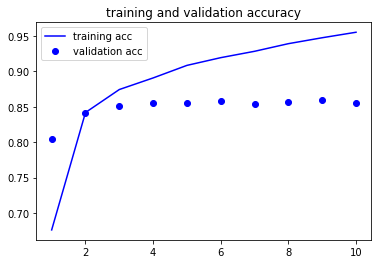

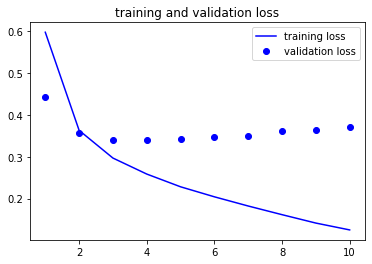

In [0]:
import matplotlib.pyplot as plt
acc=result.history['acc']
val_acc=result.history['val_acc']
loss=result.history['loss']
val_loss=result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure() #이건 새로운 figure 창을 띄우는 method
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [1]:
#pip install pyprind
import pyprind
import pandas as pd
import os
import numpy as np
imdb_dir='C:/Users/82104/Desktop/aclImdb/aclImdb'
labels={'pos':1, 'neg':0}

In [2]:
pbar=pyprind.ProgBar(50000)
df=pd.DataFrame()
print(df)
print('----------------------------------')
print(pbar)

Empty DataFrame
Columns: []
Index: []
----------------------------------
Title: 
  Started: 04/16/2020 21:22:43
  Finished: 04/16/2020 21:22:43
  Total time elapsed: 00:00:00


In [3]:
for data_type in ('test', 'train'):
    for label_type in ('pos','neg'):
        path=os.path.join(imdb_dir,data_type,label_type)
        for file in os.listdir(path):
            with open(os.path.join(path,file),'r', encoding='utf-8') as infile: # encoding 반드시 써주기.
                txt=infile.read() #한꺼번에 데이터를 텍스트로 읽음.
            df=df.append([[txt,labels[label_type]]], ignore_index=True) #다 찾아보면서 이해해보기.
            pbar.update()

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:05:38


In [4]:



df.columns=['review', 'sentiment']
print(df.head())
print(df.shape)
df=df.reindex(np.random.permutation(df.index))

# numpy data의 경우,
# np.random.shuffle(data) + #np.random.shuffle(labels)


# pandas 데이터일 경우, 
# data.sample(frac=1).reset_index(drop=True) 
# or data.reindex(np.random.permutation(data.index))


#pandas일때와 numpy일때 자료를 섞는 방법이 다르므로, 꼭 숙지. 



# 데이터 받는과정 보는중.
# http://mng.bz/0tIo 

                                              review  sentiment
0  I went and saw this movie last night after bei...          1
1  Actor turned director Bill Paxton follows up h...          1
2  As a recreational golfer with some knowledge o...          1
3  I saw this film in a sneak preview, and it is ...          1
4  Bill Paxton has taken the true story of the 19...          1
(50000, 2)


In [5]:
print(df.index)
df.head()

Int64Index([13683, 42779, 34645, 12182, 32170, 10854, 46955, 41870, 43081,
             8371,
            ...
            12269, 46028, 44821, 27649, 44700, 20314, 29064, 39111, 32693,
            42638],
           dtype='int64', length=50000)


,review,sentiment
13683,There seems to have been some money behind thi...,0
42779,"I understand the jokes quite well, they just a...",0
34645,I am and was very entertained by the movie. It...,1
12182,The role of economics in the industrialized No...,1
32170,"Honestly, I was expecting to HATE this one, an...",1


In [29]:
# import os
# os.chdir('C:/Users/82104/Desktop')
# df.to_csv('imdb.csv')

In [30]:
# 읽는건 
# df2 = pd.read_csv('imdb.csv',index_col=0)

In [31]:
# df2.head()

,review,sentiment
13683,There seems to have been some money behind thi...,0
42779,"I understand the jokes quite well, they just a...",0
34645,I am and was very entertained by the movie. It...,1
12182,The role of economics in the industrialized No...,1
32170,"Honestly, I was expecting to HATE this one, an...",1


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
training_samples=25000
validation_samples=10000 
max_words=10000 #실제로는 9999 #이는, 만개의 input노드를 의미하며, 단어공간을 만개로 정의하는것을 의미.
maxlen=100 #문장당 100개씩 잘라볼거임.
token=Tokenizer(num_words=max_words)

In [3]:
3 // 4

0

In [7]:
token.fit_on_texts(df['review'].values) # .value 는 index가 사라지면서 값만나옴. numpy로 나옴.

In [8]:
sequence=token.texts_to_sequences(df['review'].values)
word_index=token.word_index
print(len(word_index))

124252


In [9]:
labels=df['sentiment'].values 
data=pad_sequences(sequence, maxlen=maxlen)
print(data.shape)
print(labels.shape)

(50000, 100)
(50000,)


In [10]:
# numpy data의 경우,
# np.random.shuffle(data) + # np.random.shuffle(labels)


# pandas 데이터일 경우, 
# data.sample(frac=1).reset_index(drop=True) 
# or data.reindex(np.random.permutation(data.index))


#pandas일때와 numpy일때 자료를 섞는 방법이 다르므로, 꼭 숙지. 


x_train=data[:training_samples]
y_train=labels[:training_samples]
x_val=data[training_samples:training_samples+10000]
y_val=labels[training_samples:training_samples+10000]
x_test=data[training_samples+10000:]
y_test=labels[training_samples+10000:]

In [30]:
# glove 모형에 의해 이미 만들어진 word embedding은 다음의 주소에서 다운받는다.
# https://nlp.stanford.edu/projects/glove -> glove.6B.zip 다운받음.

#50차원, 100차원, 200차원, 300차원 4가지 word embedding 벡터를 제공함.
# 우리는 이중 100차원을 사용함. (dense matrix) / 차원이 크면 클수록 문맥적 의미를 더 잘 고려하는 
# embedding을 불러옴. 
# 즉, 40만개의 단어중, 100 x 100의 dense matrix 로 표현한 모형을 불러옴.

glove_dir='C:/Users/82104/Desktop/glove.6B'
embedding_index={}
f=open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding='UTF8') # utf-8이 맞는표현

# glove.6B.100d.txt 는 각 줄마다 첫번째에 text값, 이어지는 100개의 열에는 text에 해당하는 dense vector가 있음.

for line in f:
    values=line.split()
    word=values[0]
    seq=np.asarray(values[1:],dtype='float32') # 1번은 100개의 dim으로 word embedding진행.
    embedding_index[word]=seq # 함수화시킴.
f.close
print(len(embedding_index)) #40만개의 words에 대한 100개의 feature들이 있음.

400000


In [32]:
embedding_dim=100
embedding_matrix=np.zeros((max_words,embedding_dim)) # dense vector를 100개로, 우리가 다루기로 했었음.
for word,i in word_index.items(): # dict였음.
    if i<max_words:
        embedding_vector=embedding_index.get(word) 
        # glove 이용과정. imdb의 10000개 데이터에 대한것들만 를 glove 모수에 계산함.
        # 마치 pre-training 하듯.
        
        if embedding_vector is not None:
            embedding_matrix[i]=embedding_vector

In [33]:
embedding_matrix.shape

(10000, 100)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,Flatten,Dropout
model_gl=Sequential()
model_gl.add(Embedding(max_words,embedding_dim,input_length=maxlen)) # 1만개였고, 100개의 노드 -> 100만
# max_words = 1만 , embedding_dim = 100 (텍스트에서 100을 썻으므로) , input_length = 100 (시간스텝- 설정한 window size)

model_gl.add(Flatten())
model_gl.add(Dropout(0.3))
model_gl.add(Dense(1,activation='sigmoid'))
model_gl.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_17 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 10000)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 10001     
Total params: 1,010,001
Trainable params: 1,010,001
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_gl.layers[0].set_weights([embedding_matrix]) # glove에 통과시켜 만든 embedding matrix
model_gl.layers[0].trainable=False # trainable하지 않게. 즉, 10001개만 학습시킴.

In [0]:
model_gl.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
gl_result=model_gl.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_val,y_val)) 
model_gl.save_weights('C:/Users/ysp/Desktop/딥러닝 프로그램/glove_model.h5')                 

Train on 25000 samples, validate on 10000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 96us/step - loss: 0.7066 - acc: 0.6281 - val_loss: 0.9267 - val_acc: 0.5683
Epoch 2/20
25000/25000 [==============================] - 2s 85us/step - loss: 0.6168 - acc: 0.6999 - val_loss: 0.7735 - val_acc: 0.6339
Epoch 3/20
25000/25000 [==============================] - 2s 85us/step - loss: 0.5941 - acc: 0.7211 - val_loss: 0.6138 - val_acc: 0.7066
Epoch 4/20
25000/25000 [==============================] - 2s 85us/step - loss: 0.5749 - acc: 0.7366 - val_loss: 0.5868 - val_acc: 0.7229
Epoch 5/20
25000/25000 [==============================] - 2s 87us/step - loss: 0.5638 - acc: 0.7422 - val_loss: 0.6242 - val_acc: 0.7133
Epoch 6/20
25000/25000 [==============================] - 2s 88us/step - loss: 0.5731 - acc: 0.7418 - val_loss: 0.7582 - val_acc: 0.6765
Epoch 7/20
25000/25000 [==============================] - 2s 86us/step - loss: 0.5704 - acc: 0.7459 - val_loss: 0.6380 - val_acc

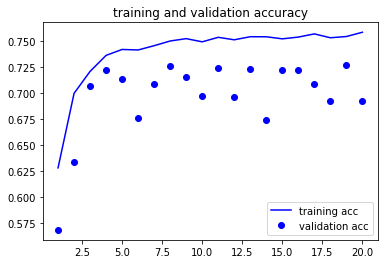

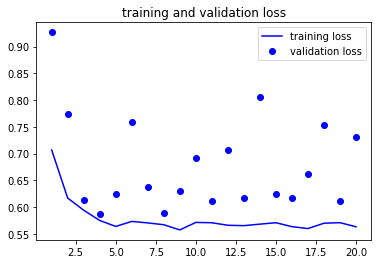

In [0]:
import matplotlib.pyplot as plt
acc=gl_result.history['acc']
val_acc=gl_result.history['val_acc']
loss=gl_result.history['loss']
val_loss=gl_result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

# glove를 써도 생각보다 안좋은 경우가 많다.
# 그래서 텍스트에 특화된 embedding을 사용하는 경우가 많다.
# overfitting 치료방법도 생각해야함.
# mlp층을 넣는다는지, dropout 사용, 마지막 층 노드 줄이기, 
# time step을 500개로 늘려보기. normalization 하지말기.

#dropout 비율도 변경해보기.

In [0]:
loss,acc=model_gl.evaluate(x_test,y_test)
print(loss)
print(acc)

15000/15000 [==============================] - 1s 35us/step
0.7352235678990682
0.6937999725341797


In [0]:
#제 6장의 과제 마감날은 23일 오후 2시입니다. 23일 당일만 e-mail로 과제를 제출해야 합니다.

#1. time steps를 100에서 500으로 증가시킬 것. 이전학습에서도 동일하게 time steps를 증가하여 학습시킬 것

#2. dropout를 이용하여 과대적합문제를 해결할 것

#3. 다른 사항은 강의 녹화를 듣고 반영할 것